In [ ]:
!pip install tensorflow_hub


In [ ]:
pip install nltk

In [ ]:
!pip install keras tf-models-official pydot graphviz

In [ ]:
import os

import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub

from keras.utils import np_utils

import official.nlp.bert.bert_models
import official.nlp.bert.configs
import official.nlp.bert.run_classifier
import official.nlp.bert.tokenization as tokenization

from official.modeling import tf_utils
from official import nlp
from official.nlp import bert

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("train20_augmented3.csv",                
                   
                      names=[
                             
                             'Question',
                        'Category'
                    
                        ])

df

,Question,Category
0,will covid stay and last perpetually,Speculation
1,will covid stay and last forever,Speculation
2,will covid stay forever last and,Speculation
3,will covid stay and forever,Speculation
4,will covid stay and last everlastingly,Speculation
...,...,...
4110,what should you do you suspect you have covid,Individual Response
4111,what should you do if suspect you you have covid,Individual Response
4112,what should you do if you defendant you have c...,Individual Response
4113,what should you if you suspect you have covid,Individual Response


In [ ]:
df.Category.unique()



array(['Speculation', 'Testing', 'Transmission', 'Nomenclature',
       'Reporting', 'Societal Response', 'Societal Effects', 'Origin',
       'Prevention', 'Treatment', 'Comparison', 'Economic Effects',
       'Symptoms', 'Having COVID', 'Individual Response'], dtype=object)

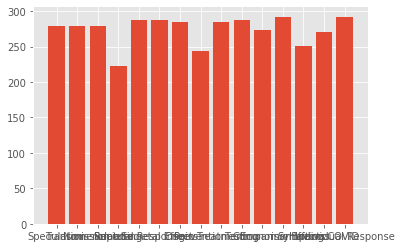

In [ ]:
classes = df.Category.unique()
counts = []

for i in classes:
  count = len(df[df.Category==i])
  counts.append(count)

plt.bar(['Speculation', 'Transmission', 'Nomenclature', 'Reporting',
       'Societal Response', 'Societal Effects', 'Origin', 'Prevention',
       'Treatment', 'Testing', 'Comparison', 'Economic Effects',
       'Symptoms', 'Having COVID', 'Individual Response'], counts)
plt.show()

In [ ]:
indexNames = df[ df.Category == 'Individual Response' ].index

In [ ]:
indexNames

Int64Index([3823, 3824, 3825, 3826, 3827, 3828, 3829, 3830, 3831, 3832,
            ...
            4105, 4106, 4107, 4108, 4109, 4110, 4111, 4112, 4113, 4114],
           dtype='int64', length=292)

In [ ]:
df.drop(indexNames , inplace=True)

In [ ]:
df.Category.unique()

array(['Speculation', 'Testing', 'Transmission', 'Nomenclature',
       'Reporting', 'Societal Response', 'Societal Effects', 'Origin',
       'Prevention', 'Treatment', 'Comparison', 'Economic Effects',
       'Symptoms', 'Having COVID'], dtype=object)

In [ ]:
indexNames = df[ df.Category == 'Reporting' ].index

In [ ]:
df.drop(indexNames , inplace=True)

In [ ]:
df.Category.unique()

array(['Speculation', 'Testing', 'Transmission', 'Nomenclature',
       'Societal Response', 'Societal Effects', 'Origin', 'Prevention',
       'Treatment', 'Comparison', 'Economic Effects', 'Symptoms',
       'Having COVID'], dtype=object)

In [ ]:
indexNames = df[ df.Category == 'Having COVID' ].index

In [ ]:
df.drop(indexNames , inplace=True)

In [ ]:
df.Category.unique()

array(['Speculation', 'Testing', 'Transmission', 'Nomenclature',
       'Societal Response', 'Societal Effects', 'Origin', 'Prevention',
       'Treatment', 'Comparison', 'Economic Effects', 'Symptoms'],
      dtype=object)

In [ ]:
indexNames = df[ df.Category == 'Societal Response' ].index

In [ ]:
df.drop(indexNames , inplace=True)

In [ ]:
indexNames = df[ df.Category == 'Individual Response' ].index

In [ ]:
df.drop(indexNames , inplace=True)

In [ ]:
df.Category.unique()

array(['Speculation', 'Testing', 'Transmission', 'Nomenclature',
       'Societal Effects', 'Origin', 'Prevention', 'Treatment',
       'Comparison', 'Economic Effects', 'Symptoms'], dtype=object)

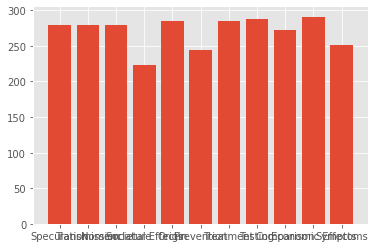

In [ ]:
classes = df.Category.unique()
counts = []

for i in classes:
  count = len(df[df.Category==i])
  counts.append(count)

plt.bar(['Speculation', 'Transmission', 'Nomenclature', 'Societal Effects',
       'Origin', 'Prevention', 'Treatment', 'Testing', 'Comparison',
       'Economic Effects', 'Symptoms'], counts)
plt.show()

In [ ]:
df=df.dropna()
df=df.reset_index()


In [ ]:
df.Question

0               will covid stay and last perpetually
1                   will covid stay and last forever
2                   will covid stay forever last and
3                        will covid stay and forever
4             will covid stay and last everlastingly
                            ...                     
2972    who covid world health organization symptoms
2973                              who covid symptoms
2974                              who symptoms covid
2975                                    who symptoms
2976                      who covid symptom symptoms
Name: Question, Length: 2977, dtype: object

In [ ]:

#df.Question=df.Question.apply(lambda x: [item for item in x if item not in stop])


In [ ]:
df.Question[0]

'will covid stay and last perpetually'

In [ ]:
df1=pd.read_csv("testA.csv",                
                   
                      names=[
                             
                             'Question',
                        'Category'
                    
                        ])

df1

,Question,Category
0,how long will we be on lockdown for covid,Speculation
1,when do you think the world will stabilize aft...,Speculation
2,when covid will end,Speculation
3,when covid will stop,Speculation
4,if president trump opens the economy will we s...,Speculation
...,...,...
663,what are some useful tips for working at home ...,Individual Response
664,what is the first thing you would do after the...,Individual Response
665,if you were quarantined due to the covid virus...,Individual Response
666,how can i ease my anxiety during pandemics,Individual Response


In [ ]:
indexNames = df1[ df1.Category == 'Individual Response' ].index
df1.drop(indexNames , inplace=True)

indexNames = df1[ df1.Category == 'Reporting' ].index
df1.drop(indexNames , inplace=True)

indexNames = df1[ df1.Category == 'Having COVID' ].index
df1.drop(indexNames , inplace=True)
indexNames = df1[ df1.Category == 'Societal Response' ].index
df1.drop(indexNames , inplace=True)
indexNames = df1[ df1.Category == 'Individual Response' ].index
df1.drop(indexNames , inplace=True)
df1

,Question,Category
0,how long will we be on lockdown for covid,Speculation
1,when do you think the world will stabilize aft...,Speculation
2,when covid will end,Speculation
3,when covid will stop,Speculation
4,if president trump opens the economy will we s...,Speculation
...,...,...
620,can covid cause a stroke,Symptoms
621,what symptoms might people experience with covid,Symptoms
622,does the covid provoke a fever,Symptoms
623,when does fever start with covid,Symptoms


In [ ]:
df2=pd.read_csv("testB.csv",                
                   
                      names=[
                             
                             'Question',
                        'Category'
                    
                        ])



In [ ]:
indexNames = df2[ df2.Category == 'Individual Response' ].index
df2.drop(indexNames , inplace=True)

indexNames = df2[ df2.Category == 'Reporting' ].index
df2.drop(indexNames , inplace=True)

indexNames = df2[ df2.Category == 'Having COVID' ].index
df2.drop(indexNames , inplace=True)
indexNames = df2[ df2.Category == 'Societal Response' ].index
df2.drop(indexNames , inplace=True)
indexNames = df2[ df2.Category == 'Individual Response' ].index
df2.drop(indexNames , inplace=True)
df2



,Question,Category
0,is it possible for covid to come again,Speculation
1,can covid return after lockdown is lifted,Speculation
2,what are the chances that covid will hit again,Speculation
3,in what ways can covid infect medical staff,Transmission
4,is it possible to be infected by an asymptomat...,Transmission
...,...,...
211,are there other illnesses that result from covid,Symptoms
212,what other disease will covid result in,Symptoms
213,how do covid symptom start,Symptoms
214,which disease does covid cause,Symptoms


In [ ]:
df3=df2.append(df1)
df3

,Question,Category
0,is it possible for covid to come again,Speculation
1,can covid return after lockdown is lifted,Speculation
2,what are the chances that covid will hit again,Speculation
3,in what ways can covid infect medical staff,Transmission
4,is it possible to be infected by an asymptomat...,Transmission
...,...,...
620,can covid cause a stroke,Symptoms
621,what symptoms might people experience with covid,Symptoms
622,does the covid provoke a fever,Symptoms
623,when does fever start with covid,Symptoms


In [ ]:
df3=df3.dropna()
df3=df3.reset_index()
df3

,index,Question,Category
0,0,is it possible for covid to come again,Speculation
1,1,can covid return after lockdown is lifted,Speculation
2,2,what are the chances that covid will hit again,Speculation
3,3,in what ways can covid infect medical staff,Transmission
4,4,is it possible to be infected by an asymptomat...,Transmission
...,...,...,...
701,620,can covid cause a stroke,Symptoms
702,621,what symptoms might people experience with covid,Symptoms
703,622,does the covid provoke a fever,Symptoms
704,623,when does fever start with covid,Symptoms


In [ ]:
from nltk.corpus import stopwords
import nltk 
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop1=['will','was','when','how','long','what','can','do','are','has','why','have','for','whome','who','should','where','shouldnt','did','you','your','has','am','does']

In [ ]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df.Question


0               will covid stay and last perpetually
1                   will covid stay and last forever
2                   will covid stay forever last and
3                        will covid stay and forever
4             will covid stay and last everlastingly
                            ...                     
2972    who covid world health organization symptoms
2973                              who covid symptoms
2974                              who symptoms covid
2975                                    who symptoms
2976                      who covid symptom symptoms
Name: Question, Length: 2977, dtype: object

In [ ]:
df.Question

0               will covid stay and last perpetually
1                   will covid stay and last forever
2                   will covid stay forever last and
3                        will covid stay and forever
4             will covid stay and last everlastingly
                            ...                     
2972    who covid world health organization symptoms
2973                              who covid symptoms
2974                              who symptoms covid
2975                                    who symptoms
2976                      who covid symptom symptoms
Name: Question, Length: 2977, dtype: object

In [ ]:
y = df3.Category

In [ ]:
y

0       Speculation
1       Speculation
2       Speculation
3       Speculation
4       Speculation
           ...     
2970       Symptoms
2971       Symptoms
2972       Symptoms
2973       Symptoms
2974       Symptoms
Name: Category, Length: 2975, dtype: object

In [ ]:
x = df3.Question
x

0                 is it possible for covid to come again
1              can covid return after lockdown is lifted
2         what are the chances that covid will hit again
3            in what ways can covid infect medical staff
4      is it possible to be infected by an asymptomat...
                             ...                        
701                             can covid cause a stroke
702     what symptoms might people experience with covid
703                       does the covid provoke a fever
704                     when does fever start with covid
705                       what are the symptoms of covid
Name: Question, Length: 706, dtype: object

In [ ]:
#malhash lazma
sample_size = int(len(df)*0.05)
sampleDf = df.sample(sample_size, random_state=23)

In [ ]:
#  x_train=df.Question
#  y_train=df.Category
#  x_test=df3.Question
#  y_test=df3.Category


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)



In [ ]:
x_test
#x_test

485    when was the first case of covid confirmed in ...
13                  is it dangerous to get donated blood
693    is it safe to invest in buying property during...
495                           was covid created in a lab
230    can humans become infected with the covid from...
                             ...                        
451                what are the bad impacts of the covid
58     is my child still able to learn while in lockdown
630                                  how is covid tested
487                      what is the source of the virus
15           am i more likely to get covid from contacts
Name: Question, Length: 142, dtype: object

In [ ]:
x_train

94                              is it still safe to work
317          how long does the virus survive on surfaces
312    what temperature kills the virus that causes c...
250                     will covid come back in the fall
667              how does covid compare to other viruses
                             ...                        
252                                    how covid spreads
403    is the covid virus a sign of an upcoming apoca...
88     what should i do to stop my kids from getting ...
310    how long is someone contagious after getting c...
555    what steps should parents take to protect chil...
Name: Question, Length: 564, dtype: object

In [ ]:
#x_train = x_train.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop1)]))


NameError: ignored

In [ ]:
x_train

94                              is it still safe to work
317          how long does the virus survive on surfaces
312    what temperature kills the virus that causes c...
250                     will covid come back in the fall
667              how does covid compare to other viruses
                             ...                        
252                                    how covid spreads
403    is the covid virus a sign of an upcoming apoca...
88     what should i do to stop my kids from getting ...
310    how long is someone contagious after getting c...
555    what steps should parents take to protect chil...
Name: Question, Length: 564, dtype: object

In [ ]:
x_test

485    when was the first case of covid confirmed in ...
13                  is it dangerous to get donated blood
693    is it safe to invest in buying property during...
495                           was covid created in a lab
230    can humans become infected with the covid from...
                             ...                        
451                what are the bad impacts of the covid
58     is my child still able to learn while in lockdown
630                                  how is covid tested
487                      what is the source of the virus
15           am i more likely to get covid from contacts
Name: Question, Length: 142, dtype: object

In [ ]:
y_test

485              Origin
13         Transmission
693    Economic Effects
495              Origin
230        Transmission
             ...       
451    Societal Effects
58     Societal Effects
630             Testing
487              Origin
15         Transmission
Name: Category, Length: 142, dtype: object

In [ ]:
y_train

94           Prevention
317        Transmission
312        Transmission
250        Transmission
667          Comparison
             ...       
252        Transmission
403    Societal Effects
88           Prevention
310        Transmission
555          Prevention
Name: Category, Length: 564, dtype: object

In [ ]:

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y_test = encoder.transform(y_test)
encoded_Y_train = encoder.transform(y_train)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)
dummy_y_train = np_utils.to_categorical(encoded_Y_train)

In [ ]:
encoded_Y_train

array([ 4,  9,  9,  9,  0,  8,  4,  5,  9,  7,  1,  3,  6,  9, 10,  3,  9,
        2, 10,  1,  9,  6,  9,  3,  9,  8,  9,  1,  0,  5, 10,  6,  6, 10,
        9,  8,  5,  1,  9,  0,  9,  1,  6,  3, 10,  1,  9,  9,  6,  4,  9,
        3,  5,  3,  9,  6,  9,  9,  6,  2, 10,  5,  5,  8,  0,  8,  9,  4,
       10,  9,  8,  5,  9,  3,  9,  0,  4,  5,  9,  4,  9,  9,  5, 10,  5,
        4,  1,  5,  5,  1,  9, 10,  0,  4,  2,  5,  3,  2,  5,  9,  1, 10,
        9, 10,  1,  9,  3,  9,  0,  9,  8,  4,  4,  4,  2,  0,  2,  5,  4,
        4,  1,  3,  5,  2,  5,  5,  4,  9,  9, 10,  9,  9,  5,  9,  3, 10,
        4,  9,  9, 10,  2, 10,  6,  9,  3,  9,  9,  8,  6,  6,  3,  1,  2,
        0,  8,  3,  5,  4,  9, 10,  9,  9,  9,  4,  5,  0,  4,  8,  9,  4,
        4,  5,  9,  9,  5,  5,  1,  9,  9,  9,  4,  5,  4,  9,  3,  9,  9,
        3,  0,  4,  4,  4,  9,  5, 10,  4,  4,  1,  9,  9,  9,  7,  9,  9,
        3,  5,  6,  9,  8,  9,  3,  4,  1,  0,  9,  4,  9,  3,  9, 10,  8,
        1,  1,  4,  6,  4

In [ ]:
dummy_y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/2",
                            trainable=True)

In [ ]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
do_lower_case


False

In [ ]:
tokenizer.convert_tokens_to_ids(['[CLS]', '[SEP]'])


[101, 102]

In [ ]:

def encode_names(n):
   tokens = list(tokenizer.tokenize(n))
   tokens.append('[SEP]')  # seperation token. Would bemuch more useful if you had a multiple text input.
   return tokenizer.convert_tokens_to_ids(tokens)

tweets = tf.ragged.constant([
    encode_names(n) for n in x_train])

In [ ]:

print('Tokenized Tweets shape', tweets.shape.as_list())

Tokenized Tweets shape [564, None]


In [ ]:
tweets[0]


<tf.Tensor: shape=(7,), dtype=int32, numpy=array([10124, 10271, 12647, 43966, 10114, 11424,   102], dtype=int32)>

In [ ]:
x_train[0]


'is it possible for covid to come again'

In [ ]:
#fffff
tokenizedQuestion = tokenizer.tokenize(x_train[0])
for i in tokenizedQuestion:
  print(i, tokenizer.convert_tokens_to_ids([i]))

is [10124]
it [10271]
possible [14128]
for [10142]
co [11170]
##vid [32194]
to [10114]
come [10678]
again [13123]


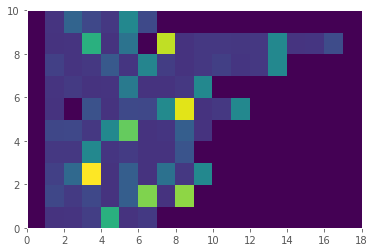

In [ ]:
cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*tweets.shape[0]
input_word_ids = tf.concat([cls, tweets], axis=-1)
_ = plt.pcolormesh(input_word_ids[0:10].to_tensor())

In [ ]:
input_word_ids


<tf.RaggedTensor [[101, 10124, 10271, 12647, 43966, 10114, 11424, 102], [101, 14796, 11695, 15107, 10105, 20399, 55681, 10135, 57445, 102], [101, 12976, 23509, 69179, 10105, 20399, 10189, 25781, 11170, 32194, 102], [101, 11337, 11170, 32194, 10678, 12014, 10106, 10105, 18042, 102], [101, 14796, 15107, 11170, 32194, 52860, 10114, 10684, 20399, 10171, 102], [101, 10149, 177, 17367, 10114, 15329, 15127, 32784, 65984, 10142, 11170, 32194, 102], [101, 10479, 11823, 10105, 10321, 28217, 10238, 10142, 11170, 32194, 102], [101, 12976, 10301, 11152, 19182, 10751, 31515, 12387, 10189, 11206, 12888, 10662, 11170, 32194, 102], [101, 10124, 10271, 43966, 10114, 26286, 169, 62432, 10188, 11178, 11168, 10940, 11170, 32194, 10393, 10590, 15943, 102], [101, 10319, 21911, 15107, 11170, 32194, 15311, 102], [101, 12976, 10124, 10105, 27949, 10230, 17155, 11170, 32194, 60600, 10230, 10105, 20511, 17313, 102], [101, 12172, 11170, 32194, 15148, 10169, 11519, 10107, 102], [101, 10124, 11155, 169, 24179, 10108

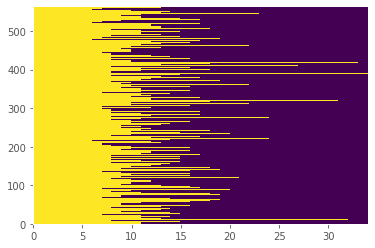

In [ ]:
input_mask = tf.ones_like(input_word_ids).to_tensor()

plt.pcolormesh(input_mask)

In [ ]:
lens = [len(i) for i in input_word_ids]


In [ ]:

max_seq_length = max(lens)
print('Max length is:', max_seq_length)

Max length is: 34


In [ ]:
max_seq_length = int(1.5*max_seq_length)
print('Max length is:', max_seq_length)

Max length is: 51


In [ ]:
def encode_names(n, tokenizer):
   tokens = list(tokenizer.tokenize(n))
   tokens.append('[SEP]')
   return tokenizer.convert_tokens_to_ids(tokens)

def bert_encode(string_list, tokenizer, max_seq_length):
  num_examples = len(string_list)
  
  string_tokens = tf.ragged.constant([
      encode_names(n, tokenizer) for n in np.array(string_list)])

  cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*string_tokens.shape[0]
  input_word_ids = tf.concat([cls, string_tokens], axis=-1)

  input_mask = tf.ones_like(input_word_ids).to_tensor(shape=(None, max_seq_length))

  type_cls = tf.zeros_like(cls)
  type_tokens = tf.ones_like(string_tokens)
  input_type_ids = tf.concat(
      [type_cls, type_tokens], axis=-1).to_tensor(shape=(None, max_seq_length))

  inputs = {
      'input_word_ids': input_word_ids.to_tensor(shape=(None, max_seq_length)),
      'input_mask': input_mask,
      'input_type_ids': input_type_ids}

  return inputs

In [ ]:
print(type(x_train))
print(type(x_test))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:

X_train = bert_encode(x_train, tokenizer, max_seq_length)
X_test = bert_encode(x_test, tokenizer, max_seq_length)

In [ ]:
num_class = len(encoder.classes_)  # Based on available class selection
max_seq_length = max_seq_length  # we calculated this a couple cells ago

input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="segment_ids")

pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])                                  

output = tf.keras.layers.Dropout(rate=0.1)(pooled_output)

output = tf.keras.layers.Dense(num_class, activation='softmax', name='output')(output)

model = tf.keras.Model(
    inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': segment_ids
        },
        outputs=output)

In [ ]:
input_word_ids

<KerasTensor: shape=(None, 51) dtype=int32 (created by layer 'input_word_ids')>

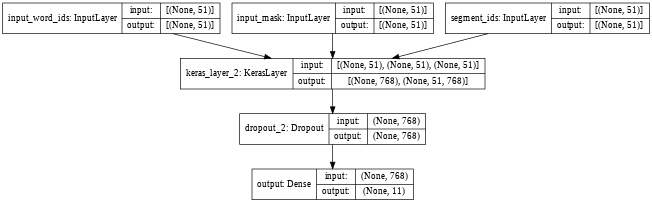

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=48)


In [ ]:
epochs = 3
batch_size = 16  # select based on your GPU resources
eval_batch_size = batch_size

train_data_size = len(dummy_y_train)
steps_per_epoch = int(train_data_size / batch_size)
num_train_steps = steps_per_epoch * epochs
warmup_steps = int(epochs * train_data_size * 0.1 / batch_size)

optimizer = nlp.optimization.create_optimizer(
    2e-5, num_train_steps=num_train_steps, num_warmup_steps=warmup_steps)
train_data_size


564

In [ ]:
num_train_steps

105

NameError: ignored

In [ ]:
num_train_steps

417

In [ ]:

warmup_steps

41

In [ ]:
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 51)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 51)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 51)]         0                                            
__________________________________________________________________________________________________
keras_layer_2 (KerasLayer)      [(None, 768), (None, 177853441   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
history = model.fit(X_train,
                    dummy_y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, dummy_y_test),
                    verbose=1)
!mkdir -p history

#if os.path.isfile(path) is False:
 # model.save(path)

Epoch 1/3
36/36 [==============================] - 37s 520ms/step - loss: 2.2855 - accuracy: 0.2109 - val_loss: 2.0940 - val_accuracy: 0.2958
Epoch 2/3
36/36 [==============================] - 18s 497ms/step - loss: 1.9417 - accuracy: 0.3323 - val_loss: 1.7328 - val_accuracy: 0.3732
Epoch 3/3
36/36 [==============================] - 18s 496ms/step - loss: 1.4831 - accuracy: 0.5137 - val_loss: 1.5786 - val_accuracy: 0.4437


In [ ]:
model_save_name = 'classifier1.pt'
path = "/content/gdrive/My Drive/classifier1.tf" 

In [ ]:
from tensorflow.keras.models import load_model
#path = "/content/gdrive/My Drive/checkpoint1" 
#newmodel = load_model(path, custom_objects={'AdamWeightDecay': optimizer})
#model.save(path)


loss, accuracy = model.evaluate(X_train, dummy_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, dummy_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.5975
Testing Accuracy:  0.4437


In [ ]:
type(optimizer)

official.nlp.optimization.AdamWeightDecay

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

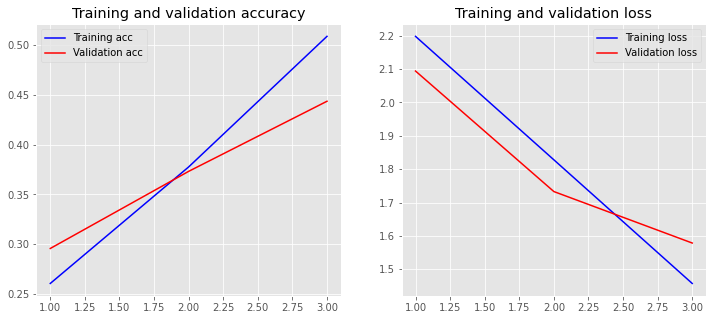

In [ ]:


plot_history(history)



In [ ]:

question1 = ['how to know if i have covid']
#question2 = ['how does covid spread']
inputs = bert_encode(string_list=list(question1), 
                     tokenizer=tokenizer, 
                     max_seq_length=51)



In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(question1[0])
tokens_without_sw = [word for word in text_tokens if not word in stop1]
tokens_without_sw

# inputs1 = bert_encode(string_list=list(tokens_without_sw), 
#                      tokenizer=tokenizer, 
#                      max_seq_length=63)

['to', 'know', 'if', 'i', 'covid']

In [ ]:
pip install nltk

In [ ]:
inputs

{'input_mask': <tf.Tensor: shape=(1, 63), dtype=int32, numpy=
 array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape=(1, 63), dtype=int32, numpy=
 array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int32)>,
 'input_word_ids': <tf.Tensor: shape=(1, 63), dtype=int32, numpy=
 array([[  101, 11170, 32194, 25609,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

In [ ]:
prediction = model.predict(inputs)

print(np.argmax(prediction))


# if np.argmax(prediction)== 0:
#   print('Comparison')
# if np.argmax(prediction)== 1:
#   print('Economic Effects')
# if np.argmax(prediction)== 2:
#   print('Having COVID')
# if np.argmax(prediction)== 3:
#   print('Individual Response')
# if np.argmax(prediction)== 4:
#   print('Nomenclature')
# if np.argmax(prediction)== 5:
#   print('Origin')
# if np.argmax(prediction)== 6:
#   print('Prevention')
# if np.argmax(prediction)== 7:
#   print('Reporting')
# if np.argmax(prediction)== 8:
#   print('Societal Effects')
# if np.argmax(prediction)== 9:
#   print('Societal Response')
# if np.argmax(prediction)== 10:
#   print('Speculation')  
# if np.argmax(prediction)== 11:
#   print('Symptoms')
# if np.argmax(prediction)== 12:
#   print('Testing')
# if np.argmax(prediction)== 13:
#   print('Transmission')
# if np.argmax(prediction)== 14:
#   print('Treatment')

#np.argmax(prediction)



5


In [ ]:
encoder.classes_


array(['Comparison', 'Economic Effects', 'Nomenclature', 'Origin',
       'Prevention', 'Societal Effects', 'Speculation', 'Symptoms',
       'Testing', 'Transmission', 'Treatment'], dtype=object)

In [ ]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

model_fname = 'Label Classifier'
my_wd = '/content/drive/My Drive/Grad/'



In [ ]:
model.save(os.path.join(my_wd, model_fname))